In [ ]:
pip install pysal

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import libpysal
from esda import Moran
import os

Moran's I: -0.00026532236667549457
P-value: 0.083


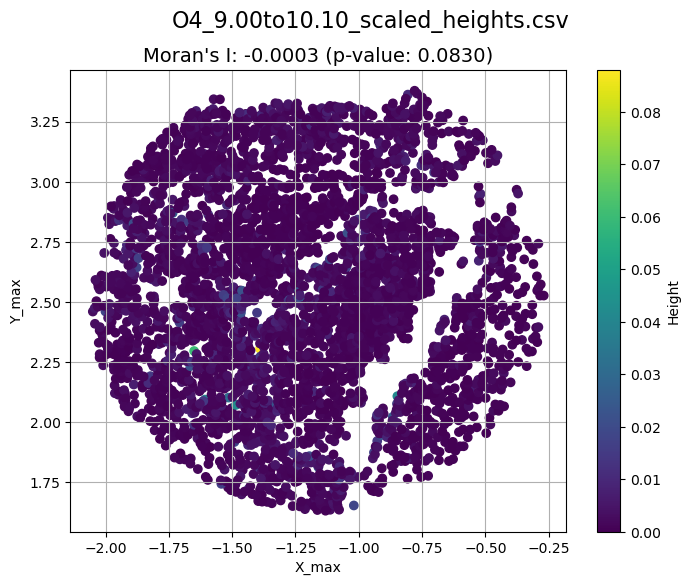

In [65]:
# Load the height data
file_name = 'O4_9.00to10.10_scaled_heights.csv'
file_path = 'F:/dataprocessingstuff/phase2_separateclusters/minandmaxheightcsv/' + file_name
data = pd.read_csv(file_path)

# Extract coordinates and height
x_coords = data['X_max']
y_coords = data['Y_max']
heights = data['Height']

# Create a spatial weights matrix (using distance-based neighbors)
# You can use k-nearest neighbors, distance thresholds, etc.
coordinates = np.array(list(zip(x_coords, y_coords)))
w = libpysal.weights.DistanceBand(coordinates, threshold=5)  # Set a threshold distance (e.g., 5 units)

# Calculate Moran's I
moran = Moran(heights, w)

# Print results
print(f"Moran's I: {moran.I}")
print(f"P-value: {moran.p_sim}")

# Visualizing the results
plt.figure(figsize=(8, 6))
plt.scatter(x_coords, y_coords, c=heights, cmap='viridis', marker='o')
plt.colorbar(label='Height')
# Add the main title (filename)
plt.suptitle(file_name, fontsize=16, ha='center')  # Main title with larger font size
# Add the subtitle (Moran's I and p-value)
plt.title(f'Moran\'s I: {moran.I:.4f} (p-value: {moran.p_sim:.4f})', fontsize=14, ha='center')
plt.xlabel('X_max')
plt.ylabel('Y_max')
plt.grid(True)

# Construct the file path
output_directory = 'F:/dataprocessingstuff/phase2_separateclusters/moransfigs'
output_file_path = os.path.join(output_directory, f"{os.path.splitext(file_name)[0]}.png")

# Save the figure
plt.savefig(output_file_path, format='png', bbox_inches='tight')

plt.show()

In [ ]:
# Directory containing the CSV files
input_directory = 'F:/dataprocessingstuff/phase2_separateclusters/minandmaxheightcsv/'
output_directory = 'F:/dataprocessingstuff/phase2_separateclusters/moransfigs'

# Loop over each CSV file in the input directory
for file_name in os.listdir(input_directory):
    if file_name.endswith('.csv'):
        file_path = os.path.join(input_directory, file_name)
        
        # Load the height data
        data = pd.read_csv(file_path)

        # Extract coordinates and height
        x_coords = data['X_max']
        y_coords = data['Y_max']
        heights = data['Height']

        # Create a spatial weights matrix (using distance-based neighbors)
        coordinates = np.array(list(zip(x_coords, y_coords)))
        w = libpysal.weights.DistanceBand(coordinates, threshold=5)  # Set a threshold distance (e.g., 5 units)

        # Calculate Moran's I
        moran = Moran(heights, w)

        # Print results
        print(f"Processing {file_name}:")
        print(f"Moran's I: {moran.I:.4f}, P-value: {moran.p_sim:.4f}")

        # Visualizing the results
        plt.figure(figsize=(8, 6))
        plt.scatter(x_coords, y_coords, c=heights, cmap='viridis', marker='o')
        plt.colorbar(label='Height')

        # Add the main title (filename)
        plt.suptitle(file_name, fontsize=16, ha='center')  # Main title with larger font size

        # Add the subtitle (Moran's I and p-value)
        plt.title(f'Moran\'s I: {moran.I:.4f} (p-value: {moran.p_sim:.4f})', fontsize=14, ha='center')

        plt.xlabel('X_max')
        plt.ylabel('Y_max')
        plt.grid(True)

        # Save the figure
        output_file_path = os.path.join(output_directory, f"{os.path.splitext(file_name)[0]}.png")
        plt.savefig(output_file_path, format='png', bbox_inches='tight')
        plt.close()  # Close the figure to avoid display in the loop

print("All figures saved successfully.")